In [33]:
# ! pip install pandas

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [40]:
df = pd.read_csv('./What_We_Watched_A_Netflix_Engagement_Report_2023Jan-Jun.csv')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent: Season 1,Yes,2023-03-23,"812,100,000"
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"665,100,000"
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"622,800,000"
3,Wednesday: Season 1,Yes,2022-11-23,"507,700,000"
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000"


## Cleaning dataset 

### Cleaning ": Season #" endings 

In [36]:
import re
def clean_title(title):
    # Regular expression to find ": season #" and remove it
    new_title = re.sub(r':\s*season\s*\d+|:\s*chapter(\s*\d+(-\d+)?)?|:\s*volume\s*\d+|//\s*.*?($|\n)', '', title, flags=re.IGNORECASE)
    return new_title

In [41]:
df['Title'] = df['Title'].apply(clean_title)
df.head()

,Title,Available Globally?,Release Date,Hours Viewed
0,The Night Agent,Yes,2023-03-23,"812,100,000"
1,Ginny & Georgia,Yes,2023-01-05,"665,100,000"
2,The Glory,Yes,2022-12-30,"622,800,000"
3,Wednesday,Yes,2022-11-23,"507,700,000"
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000"


In [38]:
df.to_csv('./result1.csv', index=False)

## Enriched dataset 

API communication has done for collecting additional information on each movie title throygh OMDB API Key. 

In [43]:
df = pd.read_csv('./data_enriched.csv')
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Year,Rated,Released,Runtime,Genre,Director,...,Awards,Poster,Ratings,Metascore,imdbRating,imdbVotes,imdbID,Type,totalSeasons,Response
0,The Night Agent,Yes,2023-03-23,"812,100,000",2023–,TV-MA,23 Mar 2023,NaN,"Action, Drama, Thriller",NaN,...,2 nominations,https://m.media-amazon.com/images/M/MV5BODgzYm...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.5,"99,566",tt13918776,series,2.0,True
1,Ginny & Georgia,Yes,2023-01-05,"665,100,000",2021–,TV-14,24 Feb 2021,NaN,"Comedy, Drama",NaN,...,Nominated for 1 Primetime Emmy. 3 wins & 6 nom...,https://m.media-amazon.com/images/M/MV5BNmE3Mj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.5,"77,563",tt10813940,series,2.0,True
2,The Glory,Yes,2022-12-30,"622,800,000",2022–,TV-MA,30 Dec 2022,NaN,"Drama, Mystery, Thriller",NaN,...,4 wins & 1 nomination,https://m.media-amazon.com/images/M/MV5BMjdlNW...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,8.1,"24,846",tt21344706,series,1.0,True
3,Wednesday,Yes,2022-11-23,"507,700,000",2022–,TV-14,23 Nov 2022,NaN,"Comedy, Crime, Fantasy",NaN,...,Nominated for 12 Primetime Emmys. 13 wins & 59...,https://m.media-amazon.com/images/M/MV5BM2ZmMj...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,8.1,"342,661",tt13443470,series,2.0,True
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"503,000,000",2023,TV-MA,04 May 2023,NaN,"Drama, History, Romance",NaN,...,Nominated for 3 Primetime Emmys. 4 wins & 15 n...,https://m.media-amazon.com/images/M/MV5BNWYwNz...,"[{'Source': 'Internet Movie Database', 'Value'...",NaN,7.4,"50,245",tt14661396,series,1.0,True


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18214 non-null  object 
 1   Available Globally?  18214 non-null  object 
 2   Release Date         4855 non-null   object 
 3   Hours Viewed         18214 non-null  object 
 4   Year                 13308 non-null  object 
 5   Rated                9052 non-null   object 
 6   Released             13065 non-null  object 
 7   Runtime              11689 non-null  object 
 8   Genre                13143 non-null  object 
 9   Director             8446 non-null   object 
 10  Writer               10288 non-null  object 
 11  Actors               12955 non-null  object 
 12  Plot                 12838 non-null  object 
 13  Language             12921 non-null  object 
 14  Country              13012 non-null  object 
 15  Awards               8543 non-null  

### Feature Extraction
extracting all features which we need for the model

In [78]:
training_df = df[['Title', 'Available Globally?', 'Hours Viewed', 'Released', 'Runtime', 'Genre', 'Language', 'Country', 'imdbRating', 'Type', 'totalSeasons', ]]
training_df.head()

,Title,Available Globally?,Hours Viewed,Released,Runtime,Genre,Language,Country,imdbRating,Type,totalSeasons
0,The Night Agent,Yes,"812,100,000",23 Mar 2023,NaN,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,Yes,"665,100,000",24 Feb 2021,NaN,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,Yes,"622,800,000",30 Dec 2022,NaN,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,Yes,"507,700,000",23 Nov 2022,NaN,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,Yes,"503,000,000",04 May 2023,NaN,"Drama, History, Romance",English,United States,7.4,series,1.0


In [79]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                18214 non-null  object 
 1   Available Globally?  18214 non-null  object 
 2   Hours Viewed         18214 non-null  object 
 3   Released             13065 non-null  object 
 4   Runtime              11689 non-null  object 
 5   Genre                13143 non-null  object 
 6   Language             12921 non-null  object 
 7   Country              13012 non-null  object 
 8   imdbRating           12525 non-null  float64
 9   Type                 13308 non-null  object 
 10  totalSeasons         4333 non-null   float64
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


## Data Cleaning
Cleaning all rows and solve all null values

In [80]:
new_column_names = {'Title': 'movie_title',
                    'Available Globally?': 'available_globally',
                    'Hours Viewed': 'viewing_hours', 'Released': 'release_date',' Runtime': 'runtime','Genre': 'genre','Language': 'language','Country': 'country','imdbRating': 'imdb_rating','Type': 'type','totalSeasons': 'total_seasons'}

training_df = training_df.rename(columns=new_column_names)
# training_df = training_df.rename(columns={'viewing_time': 'viewing_hours'})
training_df.head()

,movie_title,available_globally,viewing_hours,release_date,Runtime,genre,language,country,imdb_rating,type,total_seasons
0,The Night Agent,Yes,"812,100,000",23 Mar 2023,NaN,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,Yes,"665,100,000",24 Feb 2021,NaN,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,Yes,"622,800,000",30 Dec 2022,NaN,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,Yes,"507,700,000",23 Nov 2022,NaN,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,Yes,"503,000,000",04 May 2023,NaN,"Drama, History, Romance",English,United States,7.4,series,1.0


In [81]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         18214 non-null  object 
 1   available_globally  18214 non-null  object 
 2   viewing_hours       18214 non-null  object 
 3   release_date        13065 non-null  object 
 4   Runtime             11689 non-null  object 
 5   genre               13143 non-null  object 
 6   language            12921 non-null  object 
 7   country             13012 non-null  object 
 8   imdb_rating         12525 non-null  float64
 9   type                13308 non-null  object 
 10  total_seasons       4333 non-null   float64
dtypes: float64(2), object(9)
memory usage: 1.5+ MB


In [91]:
training_df.isnull().sum()

movie_title               0
available_globally        0
viewing_hours             0
release_date           5149
Runtime                6525
genre                  5071
language               5293
country                5202
imdb_rating            5689
type                   4906
total_seasons         13881
dtype: int64

### available_globaly

Converting Yes/No to binary numbers 1/0

In [84]:
training_df['available_globally'] = training_df['available_globally'].map({'Yes': 1, 'No': 0})

In [86]:
training_df.head()

,movie_title,available_globally,viewing_hours,release_date,Runtime,genre,language,country,imdb_rating,type,total_seasons
0,The Night Agent,1,"812,100,000",23 Mar 2023,NaN,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,1,"665,100,000",24 Feb 2021,NaN,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,1,"622,800,000",30 Dec 2022,NaN,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,1,"507,700,000",23 Nov 2022,NaN,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,1,"503,000,000",04 May 2023,NaN,"Drama, History, Romance",English,United States,7.4,series,1.0


### viewing_hours

Converting formatted string to the int numbers

In [89]:
# Replace the commas and convert the column to integers
training_df['viewing_hours'] = training_df['viewing_hours'].str.replace(',', '').astype(int)

### release_date (release_month)
Extracting months out of each release date to have release month instead, and converting string values to numbers

In [96]:
# Convert the release_date column to datetime and extract the month directly
training_df['release_date'] = pd.to_datetime(training_df['release_date'], errors='coerce', format='%d %b %Y').dt.month

In [97]:
training_df.rename(columns={'release_date': 'release_month'}, inplace=True)

Filling null values with median of the data

In [102]:
# Impute with median
median_month = training_df['release_month'].median()
training_df['release_month'].fillna(median_month, inplace=True)

In [107]:
training_df['release_month'] = training_df['release_month'].astype(int)

### runtime 
cleaning, formating and null handeling

In [126]:
# Use a regular expression to remove non-numeric characters (except NaN values)
training_df['runtime'] = training_df['runtime'].str.extract('(\d+)', expand=False)

# Convert to numeric (Int64 to handle NaN)
training_df['runtime'] = pd.to_numeric(training_df['runtime'], errors='coerce', downcast='integer')

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5      45.0
6     378.0
7      50.0
8       NaN
9       NaN
10     43.0
11      NaN
12      NaN
13    115.0
14      NaN
15      NaN
16      1.0
17      NaN
18      NaN
19    129.0
Name: runtime, dtype: float64

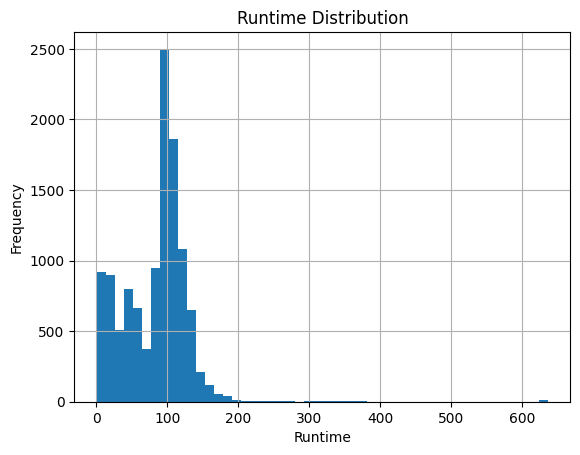

In [132]:
import matplotlib.pyplot as plt

# Assuming 'runtime' column is already converted to numeric
training_df['runtime'].dropna().hist(bins=50)
plt.title('Runtime Distribution')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()

The histogram shows the runtime values are skewed to the right, as a resutl, choosing median for filling null values would be a better option. We take this strategy as follow: 
- take median for all titles which are 'movie' 
- take median for all titles which are 'series'
- a global median for all titles which thier type is undefined 

In [133]:
# Filter out rows where either runtime or type is null
runtime_type_df = training_df.dropna(subset=['runtime', 'type'])

# Calculate median/mean runtime for movies and series
median_runtime_movie = runtime_type_df[runtime_type_df['type'] == 'movie']['runtime'].median()
median_runtime_series = runtime_type_df[runtime_type_df['type'] == 'series']['runtime'].median()
mean_runtime_movie = runtime_type_df[runtime_type_df['type'] == 'movie']['runtime'].mean()
mean_runtime_series = runtime_type_df[runtime_type_df['type'] == 'series']['runtime'].mean()

In [134]:
# Function to impute runtime
def impute_runtime(row):
    if pd.isna(row['runtime']):
        if row['type'] == 'movie':
            return median_runtime_movie
        elif row['type'] == 'series':
            return median_runtime_series
        else:
            # Handle rows where both runtime and type are null
            # You can choose to return a global median/mean or some other placeholder value
            return global_median_runtime  # Or other logic
    else:
        return row['runtime']

# Apply the function
global_median_runtime = training_df['runtime'].median()  # Global median if both runtime and type are null
training_df['runtime'] = training_df.apply(impute_runtime, axis=1)


In [135]:
training_df['runtime'] = training_df['runtime'].astype(int)

In [144]:
print('global: ' + str(global_median_runtime))
print('movie: ' + str(median_runtime_movie))
print('series: ' + str(median_runtime_series))
print('movie: ' + str(mean_runtime_movie))
print('series: ' + str(mean_runtime_series))

global: 93.0
movie: 102.0
series: 30.0
movie: 101.874715261959
series: 35.691756272401435


**Bining the runtime column**: Using bining, the categorizing different runtimes for better classification and ease of model usage. Normally, people dob't know how much exactly a motion picture would be in time, but usually have a estimation. 

- Short: less than 30 min (typically short episodes)
- Medium: 30-60 min (typical TV episodes)
- Medium Long: 60-90 min (long TV episods and short movies)
- Feature Length: 90-120 min (standard movie length)
- Long: more than 120 min (long movies or multiple episodes viewed consecutively)

In [145]:
bins = [0, 30, 60, 90, 120, training_df['runtime'].max()]
labels = ['Short', 'Medium', 'Medium Long','Feature Long', 'Long']

runtime_col_index = training_df.columns.get_loc('runtime') + 1  # get the index and add 1
runtime_categories = pd.cut(training_df['runtime'], bins=bins, labels=labels)
training_df.insert(runtime_col_index, 'runtime_category', runtime_categories)

### genre

Extracting all available genres in the dataset

In [157]:
# Split the genres by comma into lists
split_genres = training_df['genre'].str.split(', ')

# Flatten the list of lists into a single list of genres
flat_genres = [genre for sublist in split_genres.dropna() for genre in sublist]

# Get the unique genres by converting the list to a set, then back to a list
unique_single_genres = list(set(flat_genres))

print(unique_single_genres)


['History', 'Action', 'Short', 'Family', 'Adventure', 'Adult', 'Sci-Fi', 'Reality-TV', 'Music', 'Drama', 'Comedy', 'Sport', 'Talk-Show', 'Film-Noir', 'Animation', 'War', 'Western', 'Thriller', 'Biography', 'Documentary', 'Game-Show', 'Horror', 'Fantasy', 'Musical', 'News', 'Crime', 'Romance', 'Mystery']


In [153]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   movie_title         18214 non-null  object  
 1   available_globally  18214 non-null  int64   
 2   viewing_hours       18214 non-null  int64   
 3   release_month       18214 non-null  int64   
 4   runtime             18214 non-null  int64   
 5   runtime_category    18214 non-null  category
 6   genre               13143 non-null  object  
 7   language            12921 non-null  object  
 8   country             13012 non-null  object  
 9   imdb_rating         12525 non-null  float64 
 10  type                13308 non-null  object  
 11  total_seasons       4333 non-null   float64 
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 1.5+ MB


In [154]:
training_df.isnull().sum()

movie_title               0
available_globally        0
viewing_hours             0
release_month             0
runtime                   0
runtime_category          0
genre                  5071
language               5293
country                5202
imdb_rating            5689
type                   4906
total_seasons         13881
dtype: int64

In [155]:
training_df.head(20)

,movie_title,available_globally,viewing_hours,release_month,runtime,runtime_category,genre,language,country,imdb_rating,type,total_seasons
0,The Night Agent,1,812100000,3,30,Short,"Action, Drama, Thriller",English,United States,7.5,series,2.0
1,Ginny & Georgia,1,665100000,2,30,Short,"Comedy, Drama",English,United States,7.5,series,2.0
2,The Glory,1,622800000,12,30,Short,"Drama, Mystery, Thriller",Korean,South Korea,8.1,series,1.0
3,Wednesday,1,507700000,11,30,Short,"Comedy, Crime, Fantasy",English,United States,8.1,series,2.0
4,Queen Charlotte: A Bridgerton Story,1,503000000,5,30,Short,"Drama, History, Romance",English,United States,7.4,series,1.0
5,You,1,440600000,9,45,Medium,"Crime, Drama, Romance",English,United States,7.7,series,5.0
6,La Reina del Sur,0,429600000,2,378,Long,"Action, Crime, Drama","Spanish, Arabic, Russian, English","Mexico, United States, Spain, Colombia",7.9,series,3.0
7,Outer Banks,1,402500000,4,50,Medium,"Action, Crime, Drama",English,United States,7.5,series,4.0
8,Ginny & Georgia,1,302100000,2,30,Short,"Comedy, Drama",English,United States,7.5,series,2.0
9,FUBAR,1,266200000,5,30,Short,"Action, Adventure, Comedy",English,United States,6.5,series,1.0
